**Project:** Data Minining Project for  X company

In [ ]:
main_objectives ='''The main goal is to look at people's feelings, attitudes, opinions, and emotions 
based on COVID 19 data that was gathered using certain keywords. In the end, we show if the tweet has
a positive, negative, or neutral sentiment.'''

In [ ]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [ ]:
dm_outline = '''
Business understanding -Determine business objectives, assess the situation, determine data mining goals, and create a project plan.
Data understanding -consists of the following steps: gather initial data, describe data, explore data, and verify data quality
Data preparation -consists of four steps: selecting data, cleaning data, constructing data, and analyzing data.  
Modeling  - Choose a modeling technique, create a test design, construct a model, and evaluate the model.
Evaluation - Evaluate Results, Review Process, identifying Next Steps
Deployment - Plan Deployment, Plan Monitoring and Maintenance, make Final Report, Review Project
'''

In [ ]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
Write the equations of the metrics here

e.g. Precision = $\frac{TP}{(TP + FP)}$

Accuracy = $\frac{(TP+TN)}{(TP+FP+FN+TN)}$
F1 Score = $\frac{(2\times(Recall \times Precision))} {(Recall + Precision)}$

Why do you choose these metrics? minimum of 100 characters

In [ ]:
why_metrics = '''Because accuracy is the most straightforward indicator for a classification task, 
it shows us the ratio of correctly predicted predictions. Precision: the ratio of correctly predicted 
positive observations to total expected positive observations. 
Accuracy may not be the optimal statistic when applied in an imbalanced dataset. 
 F1 score conveys the balance between the precision and the recall.It provides
 a better indication than accuracy on imbalanced class.
'''

In [ ]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [ ]:
how_success = '''If the features we've chosen aid in the development of a good prediction model,
To see if our model is a good predictor, we'll divide the data into two sets: training and testing. 
This separation allows us to separate the data required to train the model from the data used to evaluate it. 
We will predict using the test data and the above classification metrics will be used after we have built the model 
inorder to see how accurate our model is.
'''

In [ ]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [ ]:
challenge_text = '''
data impurity
Time constraint
Model selection
'''

In [ ]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("./clean_processed_tweet_data.csv")


In [3]:
df.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548.0,612.0,ketuesriche,551,351,NaN,[],NaN,Mass
1,1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195.0,92.0,Grid1949,66,92,NaN,[],NaN,"Edinburgh, Scotland"
2,2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2.0,1.0,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [87, 100]}]",NaN,NaN
3,3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580.0,899.0,RIPNY08,2666,2704,NaN,"[{'text': 'Covid19', 'indices': [145, 153]}]",NaN,NaN
4,4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72.0,20.0,pash22,28250,30819,NaN,[],NaN,United Kingdom


In [4]:
Clean_Tweet = df[['original_text','polarity']]

In [5]:
def text_category(p):
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else: 
        return 'neutral'

In [6]:
scores = pd.Series([text_category(row_val) for row_val in Clean_Tweet['polarity']])
Clean_Tweet = pd.concat([Clean_Tweet, scores.rename("score")], axis=1)



NameError: name 'neutral' is not defined

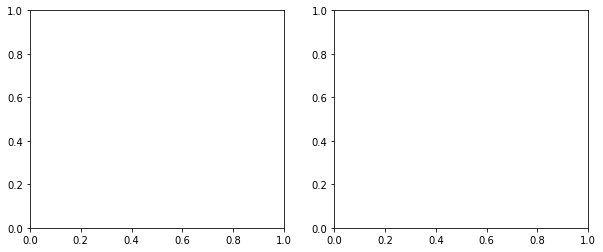

In [7]:

labels = ['neutral', 'positive', 'negative']

neutral_count = len(Clean_Tweet[Clean_Tweet['score'] == "neutral"])
positive_count = len(Clean_Tweet[Clean_Tweet['score'] == "positive"])
negative_count = len(Clean_Tweet[Clean_Tweet['score'] == "negative"])
sizes = [neutral_count, positive_count, negative_count]
fig, ax = plt.subplots(1, 2, figsize = (10,4))


ax[0].bar(x=labels, height=[neutral, positive, negative], color='blue')
ax[0].set_title('Barchart')
ax[0].set_xticklabels(labels)



ax[1].pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('piechart')
ax[1].legend(labels)

fig.suptitle('Score plot')
fig.show()

In [8]:
Clean_Tweet = Clean_Tweet[Clean_Tweet['score'] != 'neutral']

In [9]:
scoremaps = pd.Series([int(1) if value == 'positive' else int(0) for value in Clean_Tweet['score']])
Clean_Tweet = pd.concat([Clean_Tweet, scoremaps.rename("scoremap")], axis=1)
Clean_Tweet.reset_index()


,index,original_text,polarity,score,scoremap
0,0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive,1.0
1,1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive,1.0
2,2,Thank you @research2note for creating this ama...,0.316667,positive,1.0
3,3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive,1.0
4,4,I think it’s important that we don’t sell COVA...,0.280000,positive,1.0
...,...,...,...,...,...
4852,6521,Australia is sending vaccines.\nAustralia is s...,0.100000,positive,NaN
4853,6522,The Truth Behind COVID-19 Vaccines (6) —— Bell...,-0.386111,negative,NaN
4854,6524,Covid19 vaccines reach the remotest places of ...,-0.050000,negative,NaN
4855,6528,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive,NaN


In [11]:
X, y = Clean_Tweet['original_text'], Clean_Tweet['scoremap']

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41)

In [14]:

model_sgd = SGDClassifier().fit(X_train, y_train)

ValueError: could not convert string to float: 'Israel will deliver more than a million doses of #COVID19 vaccines to the Palestinian Authority to help it fight the corona pandemic.\n\nThe 1st delivery, consisting of 100,000 vaccines, was transfered to the PA friday afternoon through Bitunia crossing.\nhttps://t.co/7M3lWWr1J9'

In [ ]:
prediction = model_sgd.predict(X_test)

In [ ]:

accuracy_score(y_test, prediction)